In [18]:
import pandas as pd
df = pd.read_csv('./nyc_taxis.csv')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [19]:
df.payment_type.value_counts()

1    64356
2    24520
3      560
4      124
Name: payment_type, dtype: int64

In [20]:
df = df.drop(df[(df['payment_type'] == 3) | (df['payment_type'] == 4)].index)

In [21]:
df.payment_type.value_counts()

1    64356
2    24520
Name: payment_type, dtype: int64

In [29]:
df = df.drop(df.columns[0:5],1)

In [32]:
df.dropoff_location_code.value_counts()

4    41003
3    16497
2    11542
1     9765
6     8904
0     1028
7       74
5       63
Name: dropoff_location_code, dtype: int64

In [40]:
df_payment_1 = df[df['payment_type'] == 1]

In [41]:
df_payment_2 = df[df['payment_type'] == 2]

In [48]:
df_payment_1 = df_payment_1[:30000]

In [51]:
final = df_payment_1.append(df_payment_2)

In [52]:
X = final.drop(['payment_type'],1)
y = final['payment_type']

{1: 0.9331743702616777, 2: 0.9098190266568843, 3: 0.9430789924186843, 4: 0.940144289557349, 5: 0.9424064563462949, 6: 0.9411836634874052, 7: 0.9390437759843483, 8: 0.94002201027146}


Text(0,0.5,'accuracy')

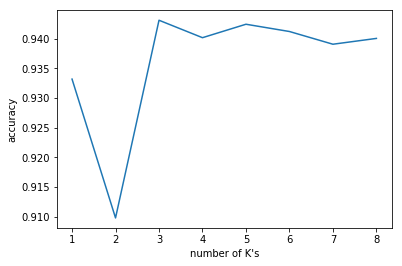

In [54]:
#X = df.drop(['diabetes'],1)
#y = df['diabetes']
accuracy = []
k = []
for x in range(1,9):
    knn = KNeighborsClassifier(n_neighbors = x)
    X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.3, random_state = 42,stratify = y)
    model_1 = knn.fit(X_train, y_train)
    y_pred = model_1.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    accuracy.append(score)
    k.append(x)
n_accuracy = dict(zip(k, accuracy))
#plt.plot(k,accuracy)
print(n_accuracy)
plt.plot(n_accuracy.keys(),n_accuracy.values())
plt.xlabel("number of K's")
plt.ylabel("accuracy")

# for n=3 , accuracy = 93.5